In [3]:
import json
import pandas

In [4]:
raw_incoming_transfers_dataframe = pandas.read_excel('data/royal_apothecary_incoming_transfer_packages_2021.xlsx', header=0)
raw_incoming_transfers_dataframe.columns

/Users/warren/venvs/bespoke/lib/python3.7/site-packages/openpyxl/styles/stylesheet.py:221: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


Index(['date_type', 'transfer_row_id', 'delivery_row_id', 'package_row_id',
       'delivery_type', 'manifest_number', 'created_date',
       'shipper_facility_license_number', 'shipper_facility_name',
       'recipient_facility_license_number', 'recipient_facility_name',
       'shipment_type_name', 'shipment_transaction_type', 'package_id',
       'package_label', 'type', 'product_category_name', 'product_name',
       'shipper_wholesale_price', 'shipped_quantity', 'lab_results_status'],
      dtype='object')

In [5]:
raw_sales_transactions_dataframe = pandas.read_excel('data/royal_apothecary_sales_transactions_2021.xlsx', header=0)
raw_sales_transactions_dataframe.columns

Index(['date_type', 'id', 'receipt_id', 'receipt_number', 'receipt_type',
       'sales_customer_type', 'sales_datetime', 'total_packages',
       'total_price', 'tx_type', 'tx_package_id', 'tx_package_label',
       'tx_product_name', 'tx_product_category_name', 'tx_unit_of_measure',
       'tx_quantity_sold', 'tx_total_price'],
      dtype='object')

In [6]:
incoming_transfers_dataframe = raw_incoming_transfers_dataframe[[
#     'date_type',
#     'transfer_row_id',
#     'delivery_row_id',
#     'package_row_id',
    'delivery_type',
    'manifest_number',
    'created_date',
    'shipper_facility_license_number',
    'shipper_facility_name',
    'recipient_facility_license_number',
    'recipient_facility_name',
    'shipment_type_name',
    'shipment_transaction_type',
    'package_id',
    'package_label',
    'type',
    'product_category_name',
    'product_name',
    'shipper_wholesale_price',
    'shipped_quantity',
    'lab_results_status',
    # TODO: payload
]]
sales_transactions_dataframe = raw_sales_transactions_dataframe[[
#     'date_type',
#     'id',
    'receipt_id',
    'receipt_number',
    'receipt_type',
    'sales_customer_type',
    'sales_datetime', # IMPORTANT
    'total_packages',
    'total_price',
    'tx_type',
    'tx_package_id',
    'tx_package_label',
    'tx_product_name',
    'tx_product_category_name',
    'tx_unit_of_measure',
    'tx_quantity_sold',
    'tx_total_price',
]]
sales_transactions_dataframe = sales_transactions_dataframe.rename(columns={'tx_package_id': 'package_id'})

In [7]:
fn = lambda row: f'{row.shipper_facility_name} ({row.shipper_facility_license_number})'
col = incoming_transfers_dataframe.apply(fn, axis=1)
incoming_transfers_dataframe = incoming_transfers_dataframe.assign(shipper_facility=col.values)

fn = lambda row: f'{row.created_date.year}-{"0" if row.created_date.month < 10 else ""}{row.created_date.month}'
col = incoming_transfers_dataframe.apply(fn, axis=1)
incoming_transfers_dataframe = incoming_transfers_dataframe.assign(created_month=col.values)

In [8]:
incoming_transfers_dataframe

,delivery_type,manifest_number,created_date,shipper_facility_license_number,shipper_facility_name,recipient_facility_license_number,recipient_facility_name,shipment_type_name,shipment_transaction_type,package_id,package_label,type,product_category_name,product_name,shipper_wholesale_price,shipped_quantity,lab_results_status,shipper_facility,created_month
0,INCOMING_FROM_VENDOR,1421236.0,2021-01-05,C11-0001106-LIC,"GREEN EARTH OPERATIONS, INC.",C10-0000596-LIC,ROYAL APOTHECARY L.L.C.,Transfer,Standard,10549184.0,1A406030000CD7A000000024,transfer_incoming,Flower (packaged eighth - each),3.5g Jars Cosmic Ice Cream Cake,NaN,64.0,passed,"GREEN EARTH OPERATIONS, INC. (C11-0001106-LIC)",2021-01
1,INCOMING_FROM_VENDOR,1421236.0,2021-01-05,C11-0001106-LIC,"GREEN EARTH OPERATIONS, INC.",C10-0000596-LIC,ROYAL APOTHECARY L.L.C.,Transfer,Standard,10548777.0,1A406030000CD7A000000023,transfer_incoming,Pre-Roll Flower,.75g AVOG Pre-Roll,NaN,64.0,passed,"GREEN EARTH OPERATIONS, INC. (C11-0001106-LIC)",2021-01
2,INCOMING_FROM_VENDOR,1421236.0,2021-01-05,C11-0001106-LIC,"GREEN EARTH OPERATIONS, INC.",C10-0000596-LIC,ROYAL APOTHECARY L.L.C.,Transfer,Standard,10548772.0,1A406030000CD7A000000022,transfer_incoming,Pre-Roll Flower,.75g CICC Pre-Roll,NaN,64.0,passed,"GREEN EARTH OPERATIONS, INC. (C11-0001106-LIC)",2021-01
3,INCOMING_FROM_VENDOR,1435757.0,2021-01-08,C11-0001146-LIC,LCISM CORP,C10-0000596-LIC,ROYAL APOTHECARY L.L.C.,Wholesale Manifest,Wholesale,10660333.0,1A406030000F99E000088407,transfer_incoming,Edible (weight - each),KIVA - Terra Bites Milk Chocolate Sea Salt Car...,220.0,20.0,passed,LCISM CORP (C11-0001146-LIC),2021-01
4,INCOMING_FROM_VENDOR,1435757.0,2021-01-08,C11-0001146-LIC,LCISM CORP,C10-0000596-LIC,ROYAL APOTHECARY L.L.C.,Wholesale Manifest,Wholesale,10660336.0,1A406030000F99E000088410,transfer_incoming,Edible (weight - each),Camino Gummies Midnight Blueberry,540.0,60.0,passed,LCISM CORP (C11-0001146-LIC),2021-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2192,INCOMING_FROM_VENDOR,2391513.0,2021-09-01,C11-0001071-LIC,"KDM HOLDINGS, LLC",C10-0000596-LIC,ROYAL APOTHECARY L.L.C.,Wholesale Manifest,Wholesale,17470280.0,1A406030000A429000098718,transfer_incoming,Vape Cartridge (volume - each),LIIIL - SFV OG Disposable - 0.5g,125.0,10.0,unknown,"KDM HOLDINGS, LLC (C11-0001071-LIC)",2021-09
2193,INCOMING_FROM_VENDOR,2391513.0,2021-09-01,C11-0001071-LIC,"KDM HOLDINGS, LLC",C10-0000596-LIC,ROYAL APOTHECARY L.L.C.,Wholesale Manifest,Wholesale,17470277.0,1A406030000A429000098717,transfer_incoming,Vape Cartridge (weight - each),LIIIL - King Louis XIII OG Disposable - 0.5g,125.0,10.0,unknown,"KDM HOLDINGS, LLC (C11-0001071-LIC)",2021-09
2194,INCOMING_FROM_VENDOR,2391513.0,2021-09-01,C11-0001071-LIC,"KDM HOLDINGS, LLC",C10-0000596-LIC,ROYAL APOTHECARY L.L.C.,Wholesale Manifest,Wholesale,17470276.0,1A406030000A429000098716,transfer_incoming,Vape Cartridge (weight - each),LIIIL - Blue Burst Disposable - 0.5g,125.0,10.0,unknown,"KDM HOLDINGS, LLC (C11-0001071-LIC)",2021-09
2195,INCOMING_FROM_VENDOR,2391513.0,2021-09-01,C11-0001071-LIC,"KDM HOLDINGS, LLC",C10-0000596-LIC,ROYAL APOTHECARY L.L.C.,Wholesale Manifest,Wholesale,17470290.0,1A406030000A429000098715,transfer_incoming,Vape Cartridge (weight - each),LIIIL - Strawberry Cough Disposable - 0.5g,125.0,10.0,unknown,"KDM HOLDINGS, LLC (C11-0001071-LIC)",2021-09


In [9]:
fn = lambda row: f'{row.sales_datetime.year}-{"0" if row.sales_datetime.month < 10 else ""}{row.sales_datetime.month}'
col = sales_transactions_dataframe.apply(fn, axis=1)
sales_transactions_dataframe = sales_transactions_dataframe.assign(sales_month=col.values)

fn = lambda row: f'{row.sales_datetime.year}-{"0" if row.sales_datetime.month < 10 else ""}{row.sales_datetime.month}-{"0" if row.sales_datetime.day < 10 else ""}{row.sales_datetime.day}'
col = sales_transactions_dataframe.apply(fn, axis=1)
sales_transactions_dataframe = sales_transactions_dataframe.assign(sales_date=col.values)

In [10]:
sales_transactions_dataframe

,receipt_id,receipt_number,receipt_type,sales_customer_type,sales_datetime,total_packages,total_price,tx_type,package_id,tx_package_label,tx_product_name,tx_product_category_name,tx_unit_of_measure,tx_quantity_sold,tx_total_price,sales_month,sales_date
0,70682699.0,70682699.0,active,Consumer,2021-01-02 09:58:35.860,1.0,15.3,active,10107839.0,1A4060300003D59000014639,Cali Flwr Farms - Cali Berry (3.5 GM Flower) (...,Flower,Grams,3.5,15.3,2021-01,2021-01-02
1,70685535.0,70685535.0,active,Consumer,2021-01-02 10:18:18.930,1.0,18.0,active,9821095.0,1A4060300009FE9000020507,West Coast Treez - Dry Flower - INDICA - 3.5g ...,Flower,Grams,3.5,18.0,2021-01,2021-01-02
2,70685842.0,70685842.0,active,Consumer,2021-01-02 10:20:21.890,2.0,72.0,active,9813136.0,1A406030000A3C3000028651,Cookies | Red Vines | 1g | Flower | Indoor | Bag,Flower (packaged gram - each),Each,1.0,16.2,2021-01,2021-01-02
3,70685842.0,70685842.0,active,Consumer,2021-01-02 10:20:21.890,2.0,72.0,active,9812957.0,1A406030000A3C3000028648,Lemonnade | NYC Haze | 3.5g | Flower | Indoor,Flower (packaged eighth - each),Each,1.0,55.8,2021-01,2021-01-02
4,70686157.0,70686157.0,active,Consumer,2021-01-02 10:22:29.860,1.0,5.4,active,10107769.0,1A4060300003D59000014640,Cali Flwr Farms - Cali Gas OG (1 GM Flower) (#...,Flower,Grams,1.0,5.4,2021-01,2021-01-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52877,126049081.0,126049081.0,active,Consumer,2021-08-31 20:28:12.810,1.0,48.6,active,17262241.0,1A4060300006023000095961,Korova Flower - Alien Apple Fritter - 3.5g / C...,Flower (packaged eighth - each),Each,1.0,48.6,2021-08,2021-08-31
52878,126049986.0,126049986.0,active,Patient,2021-08-31 20:32:15.290,2.0,41.4,active,15523657.0,1A406030000601A000217581,Farmer and the Felon Rolls Choice A Flower (1/...,Flower (packaged eighth - each),Each,1.0,28.8,2021-08,2021-08-31
52879,126049986.0,126049986.0,active,Patient,2021-08-31 20:32:15.290,2.0,41.4,active,11086639.0,1A406030000339A000009332,Kosher Dawg 1g,Flower (packaged gram - each),Each,1.0,12.6,2021-08,2021-08-31
52880,126051478.0,126051478.0,active,Consumer,2021-08-31 20:38:37.890,1.0,20.0,active,16656393.0,1A4060300003D59000018288,Rich & Ruthless - CPT Magic (SMALLS) (3.5 GM F...,Flower (packaged eighth - each),Each,2.0,20.0,2021-08,2021-08-31


In [11]:
result_dataframe = incoming_transfers_dataframe.set_index('package_id').join(sales_transactions_dataframe.set_index('package_id'), on='package_id', how='inner', lsuffix='_l', rsuffix='_r')
result_dataframe

,delivery_type,manifest_number,created_date,shipper_facility_license_number,shipper_facility_name,recipient_facility_license_number,recipient_facility_name,shipment_type_name,shipment_transaction_type,package_label,...,total_price,tx_type,tx_package_label,tx_product_name,tx_product_category_name,tx_unit_of_measure,tx_quantity_sold,tx_total_price,sales_month,sales_date
package_id,,,,,,,,,,,,,,,,,,,,,
10549184.0,INCOMING_FROM_VENDOR,1421236.0,2021-01-05,C11-0001106-LIC,"GREEN EARTH OPERATIONS, INC.",C10-0000596-LIC,ROYAL APOTHECARY L.L.C.,Transfer,Standard,1A406030000CD7A000000024,...,22.80,active,1A406030000CD7A000000024,3.5g Jars Cosmic Ice Cream Cake,Flower (packaged eighth - each),Each,1.0,22.8,2021-01,2021-01-05
10549184.0,INCOMING_FROM_VENDOR,1421236.0,2021-01-05,C11-0001106-LIC,"GREEN EARTH OPERATIONS, INC.",C10-0000596-LIC,ROYAL APOTHECARY L.L.C.,Transfer,Standard,1A406030000CD7A000000024,...,179.35,active,1A406030000CD7A000000024,3.5g Jars Cosmic Ice Cream Cake,Flower (packaged eighth - each),Each,1.0,32.3,2021-01,2021-01-06
10549184.0,INCOMING_FROM_VENDOR,1421236.0,2021-01-05,C11-0001106-LIC,"GREEN EARTH OPERATIONS, INC.",C10-0000596-LIC,ROYAL APOTHECARY L.L.C.,Transfer,Standard,1A406030000CD7A000000024,...,65.70,active,1A406030000CD7A000000024,3.5g Jars Cosmic Ice Cream Cake,Flower (packaged eighth - each),Each,1.0,34.2,2021-01,2021-01-06
10549184.0,INCOMING_FROM_VENDOR,1421236.0,2021-01-05,C11-0001106-LIC,"GREEN EARTH OPERATIONS, INC.",C10-0000596-LIC,ROYAL APOTHECARY L.L.C.,Transfer,Standard,1A406030000CD7A000000024,...,35.10,active,1A406030000CD7A000000024,3.5g Jars Cosmic Ice Cream Cake,Flower (packaged eighth - each),Each,1.0,34.2,2021-01,2021-01-07
10549184.0,INCOMING_FROM_VENDOR,1421236.0,2021-01-05,C11-0001106-LIC,"GREEN EARTH OPERATIONS, INC.",C10-0000596-LIC,ROYAL APOTHECARY L.L.C.,Transfer,Standard,1A406030000CD7A000000024,...,97.01,active,1A406030000CD7A000000024,3.5g Jars Cosmic Ice Cream Cake,Flower (packaged eighth - each),Each,1.0,38.0,2021-01,2021-01-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17084257.0,INCOMING_FROM_VENDOR,2350514.0,2021-08-23,C12-0000244-LIC,"SEED 2 SOUL, LLC",C10-0000596-LIC,ROYAL APOTHECARY L.L.C.,Wholesale Manifest,Wholesale,1A4060300007D04000009614,...,97.35,active,1A4060300007D04000009614,Green Hornet - Hybrid - Green Apple - 10 pack,Edible (weight - each),Each,1.0,11.0,2021-08,2021-08-29
17084257.0,INCOMING_FROM_VENDOR,2350514.0,2021-08-23,C12-0000244-LIC,"SEED 2 SOUL, LLC",C10-0000596-LIC,ROYAL APOTHECARY L.L.C.,Wholesale Manifest,Wholesale,1A4060300007D04000009614,...,167.45,active,1A4060300007D04000009614,Green Hornet - Hybrid - Green Apple - 10 pack,Edible (weight - each),Each,1.0,17.0,2021-08,2021-08-31
17084242.0,INCOMING_FROM_VENDOR,2350514.0,2021-08-23,C12-0000244-LIC,"SEED 2 SOUL, LLC",C10-0000596-LIC,ROYAL APOTHECARY L.L.C.,Wholesale Manifest,Wholesale,1A4060300007D04000009612,...,82.00,active,1A4060300007D04000009612,Cheeba Chews - Sleepy Time - Chocolate - 20 pack,Edible (weight - each),Each,1.0,15.0,2021-08,2021-08-25


In [12]:
result_dataframe.columns

Index(['delivery_type', 'manifest_number', 'created_date',
       'shipper_facility_license_number', 'shipper_facility_name',
       'recipient_facility_license_number', 'recipient_facility_name',
       'shipment_type_name', 'shipment_transaction_type', 'package_label',
       'type', 'product_category_name', 'product_name',
       'shipper_wholesale_price', 'shipped_quantity', 'lab_results_status',
       'shipper_facility', 'created_month', 'receipt_id', 'receipt_number',
       'receipt_type', 'sales_customer_type', 'sales_datetime',
       'total_packages', 'total_price', 'tx_type', 'tx_package_label',
       'tx_product_name', 'tx_product_category_name', 'tx_unit_of_measure',
       'tx_quantity_sold', 'tx_total_price', 'sales_month', 'sales_date'],
      dtype='object')

In [13]:
limited_result_dataframe = result_dataframe[[
#     'manifest_number',
    'package_label',
    'created_month',
    'created_date',
    'shipper_facility',
    'shipper_facility_license_number',
    'shipper_facility_name',
    'shipped_quantity',
    'sales_month',
    'sales_date',
    'sales_datetime',
    'tx_product_name',
    'tx_product_category_name',
    'tx_unit_of_measure',
    'tx_quantity_sold',
    'tx_total_price',
]]
limited_result_dataframe

,package_label,created_month,created_date,shipper_facility,shipper_facility_license_number,shipper_facility_name,shipped_quantity,sales_month,sales_date,sales_datetime,tx_product_name,tx_product_category_name,tx_unit_of_measure,tx_quantity_sold,tx_total_price
package_id,,,,,,,,,,,,,,,
10549184.0,1A406030000CD7A000000024,2021-01,2021-01-05,"GREEN EARTH OPERATIONS, INC. (C11-0001106-LIC)",C11-0001106-LIC,"GREEN EARTH OPERATIONS, INC.",64.0,2021-01,2021-01-05,2021-01-05 18:23:07.860,3.5g Jars Cosmic Ice Cream Cake,Flower (packaged eighth - each),Each,1.0,22.8
10549184.0,1A406030000CD7A000000024,2021-01,2021-01-05,"GREEN EARTH OPERATIONS, INC. (C11-0001106-LIC)",C11-0001106-LIC,"GREEN EARTH OPERATIONS, INC.",64.0,2021-01,2021-01-06,2021-01-06 13:59:05.120,3.5g Jars Cosmic Ice Cream Cake,Flower (packaged eighth - each),Each,1.0,32.3
10549184.0,1A406030000CD7A000000024,2021-01,2021-01-05,"GREEN EARTH OPERATIONS, INC. (C11-0001106-LIC)",C11-0001106-LIC,"GREEN EARTH OPERATIONS, INC.",64.0,2021-01,2021-01-06,2021-01-06 20:39:02.440,3.5g Jars Cosmic Ice Cream Cake,Flower (packaged eighth - each),Each,1.0,34.2
10549184.0,1A406030000CD7A000000024,2021-01,2021-01-05,"GREEN EARTH OPERATIONS, INC. (C11-0001106-LIC)",C11-0001106-LIC,"GREEN EARTH OPERATIONS, INC.",64.0,2021-01,2021-01-07,2021-01-07 14:15:49.880,3.5g Jars Cosmic Ice Cream Cake,Flower (packaged eighth - each),Each,1.0,34.2
10549184.0,1A406030000CD7A000000024,2021-01,2021-01-05,"GREEN EARTH OPERATIONS, INC. (C11-0001106-LIC)",C11-0001106-LIC,"GREEN EARTH OPERATIONS, INC.",64.0,2021-01,2021-01-07,2021-01-07 14:17:42.990,3.5g Jars Cosmic Ice Cream Cake,Flower (packaged eighth - each),Each,1.0,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17084257.0,1A4060300007D04000009614,2021-08,2021-08-23,"SEED 2 SOUL, LLC (C12-0000244-LIC)",C12-0000244-LIC,"SEED 2 SOUL, LLC",30.0,2021-08,2021-08-29,2021-08-29 18:13:33.090,Green Hornet - Hybrid - Green Apple - 10 pack,Edible (weight - each),Each,1.0,11.0
17084257.0,1A4060300007D04000009614,2021-08,2021-08-23,"SEED 2 SOUL, LLC (C12-0000244-LIC)",C12-0000244-LIC,"SEED 2 SOUL, LLC",30.0,2021-08,2021-08-31,2021-08-31 11:53:02.440,Green Hornet - Hybrid - Green Apple - 10 pack,Edible (weight - each),Each,1.0,17.0
17084242.0,1A4060300007D04000009612,2021-08,2021-08-23,"SEED 2 SOUL, LLC (C12-0000244-LIC)",C12-0000244-LIC,"SEED 2 SOUL, LLC",20.0,2021-08,2021-08-25,2021-08-25 16:27:16.900,Cheeba Chews - Sleepy Time - Chocolate - 20 pack,Edible (weight - each),Each,1.0,15.0


In [14]:
filter_by_product_name = limited_result_dataframe['tx_product_name'] == '3.5g Jars Cosmic Ice Cream Cake'
filtered_result_dataframe = limited_result_dataframe[filter_by_product_name]
filtered_result_dataframe

,package_label,created_month,created_date,shipper_facility,shipper_facility_license_number,shipper_facility_name,shipped_quantity,sales_month,sales_date,sales_datetime,tx_product_name,tx_product_category_name,tx_unit_of_measure,tx_quantity_sold,tx_total_price
package_id,,,,,,,,,,,,,,,
10549184.0,1A406030000CD7A000000024,2021-01,2021-01-05,"GREEN EARTH OPERATIONS, INC. (C11-0001106-LIC)",C11-0001106-LIC,"GREEN EARTH OPERATIONS, INC.",64.0,2021-01,2021-01-05,2021-01-05 18:23:07.860,3.5g Jars Cosmic Ice Cream Cake,Flower (packaged eighth - each),Each,1.0,22.80
10549184.0,1A406030000CD7A000000024,2021-01,2021-01-05,"GREEN EARTH OPERATIONS, INC. (C11-0001106-LIC)",C11-0001106-LIC,"GREEN EARTH OPERATIONS, INC.",64.0,2021-01,2021-01-06,2021-01-06 13:59:05.120,3.5g Jars Cosmic Ice Cream Cake,Flower (packaged eighth - each),Each,1.0,32.30
10549184.0,1A406030000CD7A000000024,2021-01,2021-01-05,"GREEN EARTH OPERATIONS, INC. (C11-0001106-LIC)",C11-0001106-LIC,"GREEN EARTH OPERATIONS, INC.",64.0,2021-01,2021-01-06,2021-01-06 20:39:02.440,3.5g Jars Cosmic Ice Cream Cake,Flower (packaged eighth - each),Each,1.0,34.20
10549184.0,1A406030000CD7A000000024,2021-01,2021-01-05,"GREEN EARTH OPERATIONS, INC. (C11-0001106-LIC)",C11-0001106-LIC,"GREEN EARTH OPERATIONS, INC.",64.0,2021-01,2021-01-07,2021-01-07 14:15:49.880,3.5g Jars Cosmic Ice Cream Cake,Flower (packaged eighth - each),Each,1.0,34.20
10549184.0,1A406030000CD7A000000024,2021-01,2021-01-05,"GREEN EARTH OPERATIONS, INC. (C11-0001106-LIC)",C11-0001106-LIC,"GREEN EARTH OPERATIONS, INC.",64.0,2021-01,2021-01-07,2021-01-07 14:17:42.990,3.5g Jars Cosmic Ice Cream Cake,Flower (packaged eighth - each),Each,1.0,38.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13384879.0,1A406030000CD7A000000028,2021-04,2021-04-14,"GREEN EARTH OPERATIONS, INC. (C11-0001106-LIC)",C11-0001106-LIC,"GREEN EARTH OPERATIONS, INC.",130.0,2021-06,2021-06-09,2021-06-09 12:28:51.390,3.5g Jars Cosmic Ice Cream Cake,Flower (packaged eighth - each),Each,1.0,27.00
13384879.0,1A406030000CD7A000000028,2021-04,2021-04-14,"GREEN EARTH OPERATIONS, INC. (C11-0001106-LIC)",C11-0001106-LIC,"GREEN EARTH OPERATIONS, INC.",130.0,2021-06,2021-06-10,2021-06-10 13:02:49.440,3.5g Jars Cosmic Ice Cream Cake,Flower (packaged eighth - each),Each,1.0,27.00
13384879.0,1A406030000CD7A000000028,2021-04,2021-04-14,"GREEN EARTH OPERATIONS, INC. (C11-0001106-LIC)",C11-0001106-LIC,"GREEN EARTH OPERATIONS, INC.",130.0,2021-06,2021-06-10,2021-06-10 16:08:13.550,3.5g Jars Cosmic Ice Cream Cake,Flower (packaged eighth - each),Each,1.0,0.01


In [15]:
records = filtered_result_dataframe[['package_label', 'created_date', 'shipped_quantity', 'sales_datetime', 'tx_quantity_sold']].to_records(index=False)
result = list(records)
result

[('1A406030000CD7A000000024', '2021-01-05T00:00:00.000000000', 64., '2021-01-05T18:23:07.860000000', 1.),
 ('1A406030000CD7A000000024', '2021-01-05T00:00:00.000000000', 64., '2021-01-06T13:59:05.120000000', 1.),
 ('1A406030000CD7A000000024', '2021-01-05T00:00:00.000000000', 64., '2021-01-06T20:39:02.440000000', 1.),
 ('1A406030000CD7A000000024', '2021-01-05T00:00:00.000000000', 64., '2021-01-07T14:15:49.880000000', 1.),
 ('1A406030000CD7A000000024', '2021-01-05T00:00:00.000000000', 64., '2021-01-07T14:17:42.990000000', 1.),
 ('1A406030000CD7A000000024', '2021-01-05T00:00:00.000000000', 64., '2021-01-07T16:30:13.890000000', 1.),
 ('1A406030000CD7A000000024', '2021-01-05T00:00:00.000000000', 64., '2021-01-07T16:48:43.910000000', 1.),
 ('1A406030000CD7A000000024', '2021-01-05T00:00:00.000000000', 64., '2021-01-07T17:17:12.390000000', 1.),
 ('1A406030000CD7A000000024', '2021-01-05T00:00:00.000000000', 64., '2021-01-08T13:52:00.920000000', 1.),
 ('1A406030000CD7A000000024', '2021-01-05T00:0

In [16]:
filter_by_date = limited_result_dataframe['sales_month'] == '2021-08'
filtered_result_dataframe = limited_result_dataframe[filter_by_date]
filtered_result_dataframe

,package_label,created_month,created_date,shipper_facility,shipper_facility_license_number,shipper_facility_name,shipped_quantity,sales_month,sales_date,sales_datetime,tx_product_name,tx_product_category_name,tx_unit_of_measure,tx_quantity_sold,tx_total_price
package_id,,,,,,,,,,,,,,,
10870147.0,1A40603000062D7000000164,2021-01,2021-01-18,"ANAT GROUP, INC. (C11-0000385-LIC)",C11-0000385-LIC,"ANAT GROUP, INC.",560.0,2021-08,2021-08-01,2021-08-01 20:41:57.500,Rich & Ruthless - CPT Sugar (3.5 GM Flower) (#...,Flower,Grams,3.5,18.0
11004270.0,1A4060300005E8C000006166,2021-01,2021-01-22,VARAVO (C11-0000582-LIC),C11-0000582-LIC,VARAVO,108.0,2021-08,2021-08-07,2021-08-07 16:44:51.130,Kushy Punch Hybrid Gummy 100mg,Edible (weight - each),Each,1.0,1.0
10772696.0,1A4060300005BD4000007422,2021-01,2021-01-13,GOLD COAST ENTERPRISES (C11-0000587-LIC),C11-0000587-LIC,GOLD COAST ENTERPRISES,20.0,2021-08,2021-08-01,2021-08-01 10:29:25.610,Pre-Roll Infused - 1g - Indica - DosiDoze,Pre-Roll Infused,Each,1.0,13.5
10533406.0,1A406030000A3C3000033433,2021-01,2021-01-18,SOUTHWEST CAREGIVERS INC. (C12-0000164-LIC),C12-0000164-LIC,SOUTHWEST CAREGIVERS INC.,30.0,2021-08,2021-08-05,2021-08-05 11:24:05.660,Grandiflora | High-Tech 2 | 1g | Pre-Rolled Jo...,Pre-Roll Flower,Each,1.0,15.3
10528066.0,1A4060300006027000059143,2021-01,2021-01-05,"WCC MGMT, LLC (C11-0000512-LIC)",C11-0000512-LIC,"WCC MGMT, LLC",15.0,2021-08,2021-08-20,2021-08-20 17:03:44.680,Lemon Cooler - 0.5g CUREpod,Vape Cartridge (weight - each),Each,1.0,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17084257.0,1A4060300007D04000009614,2021-08,2021-08-23,"SEED 2 SOUL, LLC (C12-0000244-LIC)",C12-0000244-LIC,"SEED 2 SOUL, LLC",30.0,2021-08,2021-08-29,2021-08-29 18:13:33.090,Green Hornet - Hybrid - Green Apple - 10 pack,Edible (weight - each),Each,1.0,11.0
17084257.0,1A4060300007D04000009614,2021-08,2021-08-23,"SEED 2 SOUL, LLC (C12-0000244-LIC)",C12-0000244-LIC,"SEED 2 SOUL, LLC",30.0,2021-08,2021-08-31,2021-08-31 11:53:02.440,Green Hornet - Hybrid - Green Apple - 10 pack,Edible (weight - each),Each,1.0,17.0
17084242.0,1A4060300007D04000009612,2021-08,2021-08-23,"SEED 2 SOUL, LLC (C12-0000244-LIC)",C12-0000244-LIC,"SEED 2 SOUL, LLC",20.0,2021-08,2021-08-25,2021-08-25 16:27:16.900,Cheeba Chews - Sleepy Time - Chocolate - 20 pack,Edible (weight - each),Each,1.0,15.0


<AxesSubplot:xlabel='shipper_facility'>

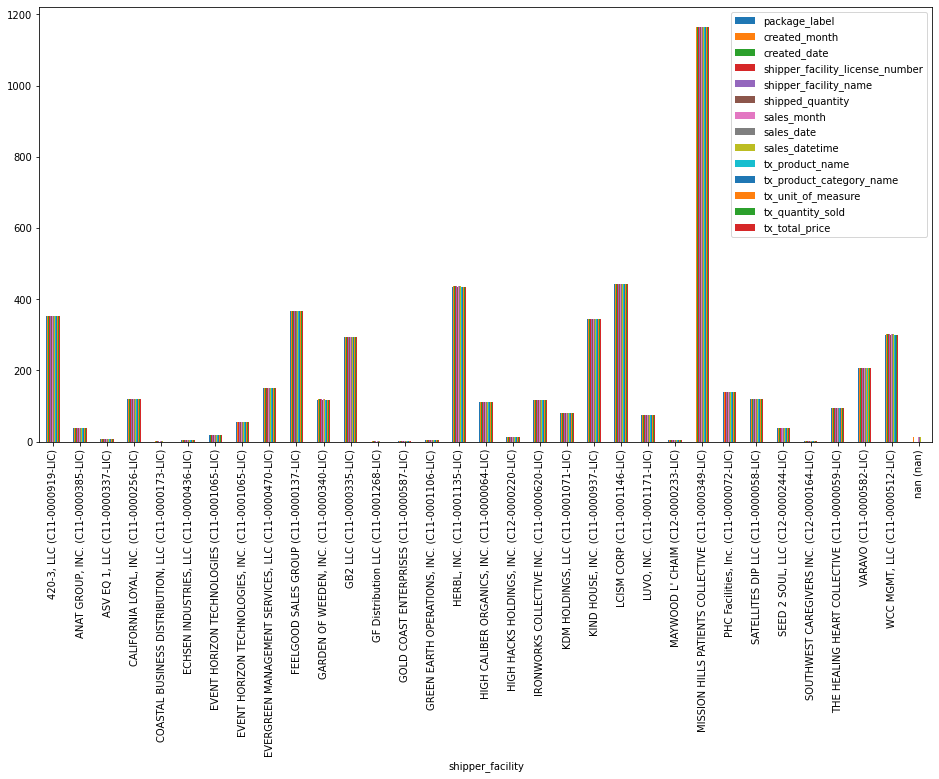

In [17]:
filtered_result_dataframe.groupby('shipper_facility').count().plot(figsize=(16, 8), kind='bar')
# gym.groupby('height_m').count().plot()

<AxesSubplot:xlabel='shipper_facility'>

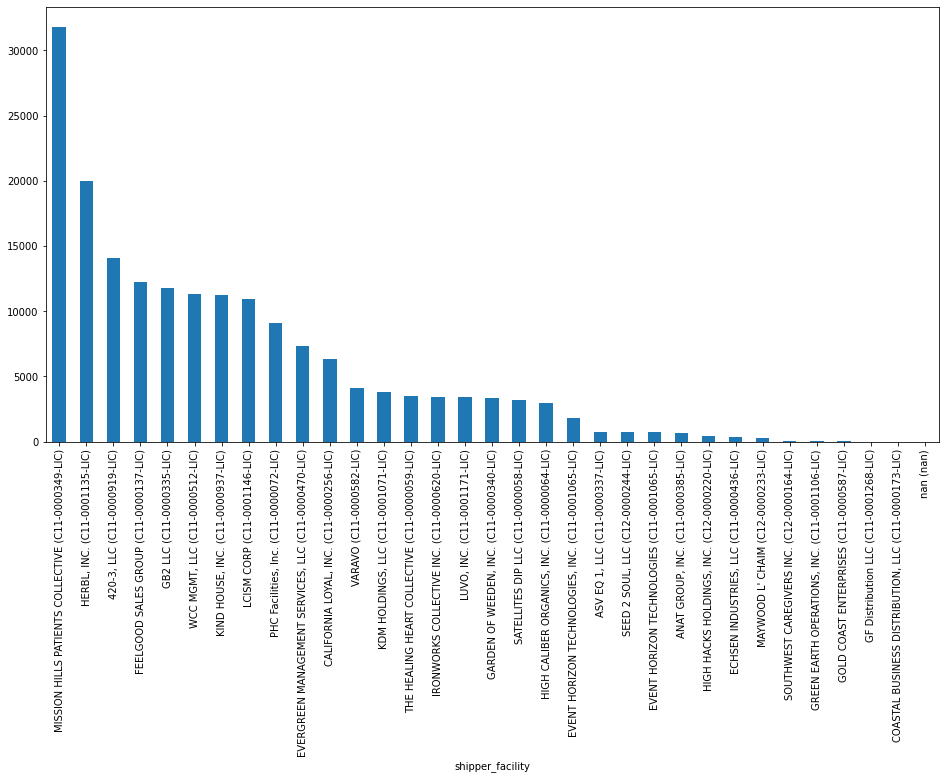

In [18]:
filtered_result_dataframe.groupby('shipper_facility')['tx_total_price'].sum().sort_values(ascending=False).plot(figsize=(16, 8), kind='bar')

In [59]:
filter_by_sales_month = limited_result_dataframe['sales_month'] == '2021-08'
filtered_result_dataframe = limited_result_dataframe[filter_by_sales_month]
filtered_result_dataframe

,package_label,created_month,created_date,shipper_facility,shipper_facility_license_number,shipper_facility_name,shipped_quantity,sales_month,sales_date,sales_datetime,tx_product_name,tx_product_category_name,tx_unit_of_measure,tx_quantity_sold,tx_total_price
package_id,,,,,,,,,,,,,,,
10870147.0,1A40603000062D7000000164,2021-01,2021-01-18,"ANAT GROUP, INC. (C11-0000385-LIC)",C11-0000385-LIC,"ANAT GROUP, INC.",560.0,2021-08,2021-08-01,2021-08-01 20:41:57.500,Rich & Ruthless - CPT Sugar (3.5 GM Flower) (#...,Flower,Grams,3.5,18.0
11004270.0,1A4060300005E8C000006166,2021-01,2021-01-22,VARAVO (C11-0000582-LIC),C11-0000582-LIC,VARAVO,108.0,2021-08,2021-08-07,2021-08-07 16:44:51.130,Kushy Punch Hybrid Gummy 100mg,Edible (weight - each),Each,1.0,1.0
10772696.0,1A4060300005BD4000007422,2021-01,2021-01-13,GOLD COAST ENTERPRISES (C11-0000587-LIC),C11-0000587-LIC,GOLD COAST ENTERPRISES,20.0,2021-08,2021-08-01,2021-08-01 10:29:25.610,Pre-Roll Infused - 1g - Indica - DosiDoze,Pre-Roll Infused,Each,1.0,13.5
10533406.0,1A406030000A3C3000033433,2021-01,2021-01-18,SOUTHWEST CAREGIVERS INC. (C12-0000164-LIC),C12-0000164-LIC,SOUTHWEST CAREGIVERS INC.,30.0,2021-08,2021-08-05,2021-08-05 11:24:05.660,Grandiflora | High-Tech 2 | 1g | Pre-Rolled Jo...,Pre-Roll Flower,Each,1.0,15.3
10528066.0,1A4060300006027000059143,2021-01,2021-01-05,"WCC MGMT, LLC (C11-0000512-LIC)",C11-0000512-LIC,"WCC MGMT, LLC",15.0,2021-08,2021-08-20,2021-08-20 17:03:44.680,Lemon Cooler - 0.5g CUREpod,Vape Cartridge (weight - each),Each,1.0,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17084257.0,1A4060300007D04000009614,2021-08,2021-08-23,"SEED 2 SOUL, LLC (C12-0000244-LIC)",C12-0000244-LIC,"SEED 2 SOUL, LLC",30.0,2021-08,2021-08-29,2021-08-29 18:13:33.090,Green Hornet - Hybrid - Green Apple - 10 pack,Edible (weight - each),Each,1.0,11.0
17084257.0,1A4060300007D04000009614,2021-08,2021-08-23,"SEED 2 SOUL, LLC (C12-0000244-LIC)",C12-0000244-LIC,"SEED 2 SOUL, LLC",30.0,2021-08,2021-08-31,2021-08-31 11:53:02.440,Green Hornet - Hybrid - Green Apple - 10 pack,Edible (weight - each),Each,1.0,17.0
17084242.0,1A4060300007D04000009612,2021-08,2021-08-23,"SEED 2 SOUL, LLC (C12-0000244-LIC)",C12-0000244-LIC,"SEED 2 SOUL, LLC",20.0,2021-08,2021-08-25,2021-08-25 16:27:16.900,Cheeba Chews - Sleepy Time - Chocolate - 20 pack,Edible (weight - each),Each,1.0,15.0


<AxesSubplot:xlabel='tx_product_name'>

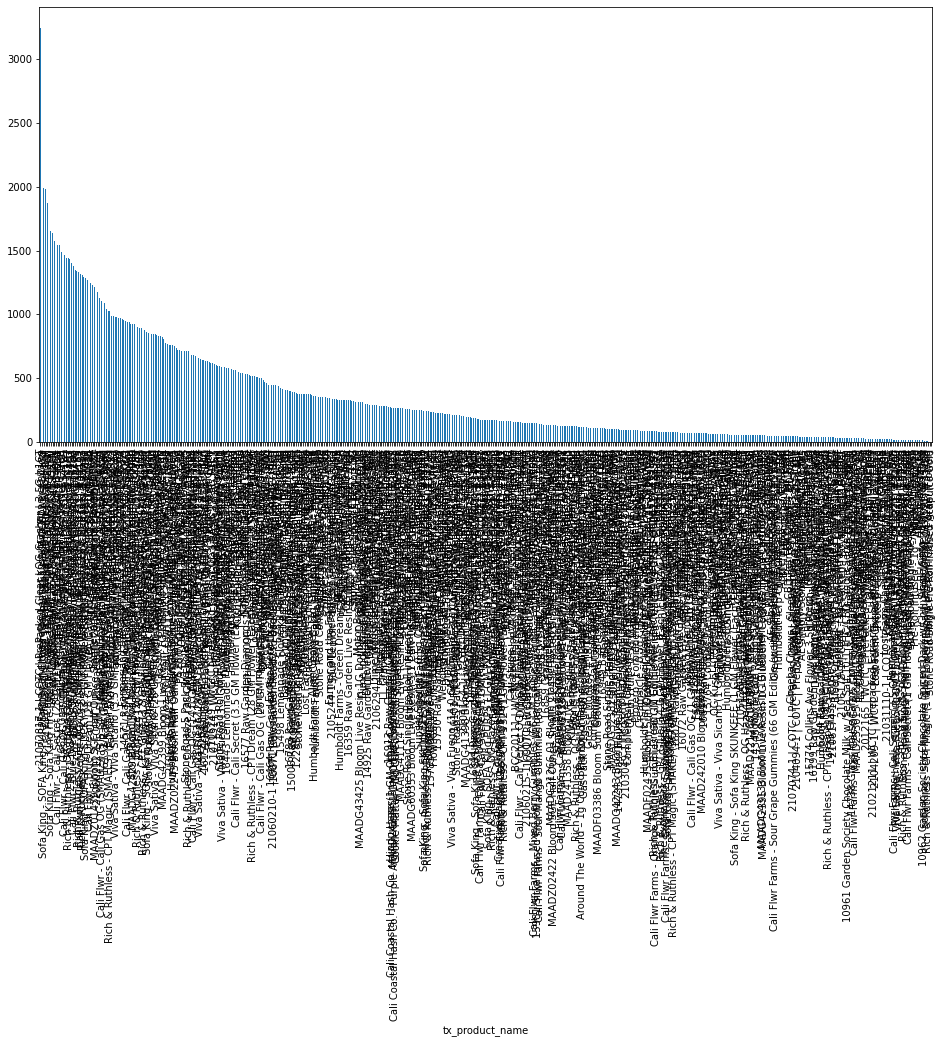

In [60]:
filtered_result_dataframe.groupby('tx_product_name')['tx_total_price'].sum().sort_values(ascending=False).plot(figsize=(16, 8), kind='bar')

In [19]:
filter_by_date_and_shipper_facility_name = (limited_result_dataframe['sales_month'] == '2021-08') & (limited_result_dataframe['shipper_facility_name'] == 'MISSION HILLS PATIENTS COLLECTIVE')
filtered_result_dataframe = limited_result_dataframe[filter_by_date_and_shipper_facility_name]
filtered_result_dataframe

,package_label,created_month,created_date,shipper_facility,shipper_facility_license_number,shipper_facility_name,shipped_quantity,sales_month,sales_date,sales_datetime,tx_product_name,tx_product_category_name,tx_unit_of_measure,tx_quantity_sold,tx_total_price
package_id,,,,,,,,,,,,,,,
15323102.0,1A4060300003D59000017097,2021-06,2021-06-21,MISSION HILLS PATIENTS COLLECTIVE (C11-0000349...,C11-0000349-LIC,MISSION HILLS PATIENTS COLLECTIVE,30.0,2021-08,2021-08-20,2021-08-20 17:53:56.520,Cali Flwr Farms - Mixed Berry Gummies (66 GM E...,Edible (weight - each),Each,1.0,10.0
15322786.0,1A4060300003D59000017092,2021-06,2021-06-21,MISSION HILLS PATIENTS COLLECTIVE (C11-0000349...,C11-0000349-LIC,MISSION HILLS PATIENTS COLLECTIVE,12.0,2021-08,2021-08-12,2021-08-12 15:52:26.280,Cali Flwr Farms - Cali Secret (28 GM Flower (E...,Flower (packaged ounce - each),Each,1.0,126.0
15322784.0,1A4060300003D59000017091,2021-06,2021-06-21,MISSION HILLS PATIENTS COLLECTIVE (C11-0000349...,C11-0000349-LIC,MISSION HILLS PATIENTS COLLECTIVE,30.0,2021-08,2021-08-09,2021-08-09 12:30:37.110,Cali Flwr Farms - Cali Secret (1 GM Flower (Ea...,Flower (packaged gram - each),Each,1.0,8.0
15322784.0,1A4060300003D59000017091,2021-06,2021-06-21,MISSION HILLS PATIENTS COLLECTIVE (C11-0000349...,C11-0000349-LIC,MISSION HILLS PATIENTS COLLECTIVE,30.0,2021-08,2021-08-09,2021-08-09 17:02:05.330,Cali Flwr Farms - Cali Secret (1 GM Flower (Ea...,Flower (packaged gram - each),Each,1.0,6.8
15322787.0,1A4060300003D59000017093,2021-06,2021-06-21,MISSION HILLS PATIENTS COLLECTIVE (C11-0000349...,C11-0000349-LIC,MISSION HILLS PATIENTS COLLECTIVE,120.0,2021-08,2021-08-02,2021-08-02 16:28:39.680,Cali Flwr Farms - Cali Secret (3.5 GM Flower (...,Flower (packaged eighth - each),Each,1.0,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17269732.0,1A4060300003D59000019144,2021-08,2021-08-25,MISSION HILLS PATIENTS COLLECTIVE (C11-0000349...,C11-0000349-LIC,MISSION HILLS PATIENTS COLLECTIVE,20.0,2021-08,2021-08-27,2021-08-27 17:49:07.300,Viva Sativa - Viva Fuego (14.0 GM Flower (Each...,Flower (packaged half ounce - each),Each,1.0,72.0
17269732.0,1A4060300003D59000019144,2021-08,2021-08-25,MISSION HILLS PATIENTS COLLECTIVE (C11-0000349...,C11-0000349-LIC,MISSION HILLS PATIENTS COLLECTIVE,20.0,2021-08,2021-08-28,2021-08-28 16:28:44.160,Viva Sativa - Viva Fuego (14.0 GM Flower (Each...,Flower (packaged half ounce - each),Each,1.0,72.0
17269731.0,1A4060300003D59000019143,2021-08,2021-08-25,MISSION HILLS PATIENTS COLLECTIVE (C11-0000349...,C11-0000349-LIC,MISSION HILLS PATIENTS COLLECTIVE,30.0,2021-08,2021-08-27,2021-08-27 20:36:07.980,Viva Sativa - Viva Fuego (1 GM Flower (Each)) ...,Flower (packaged gram - each),Each,1.0,6.0


<AxesSubplot:xlabel='tx_product_name'>

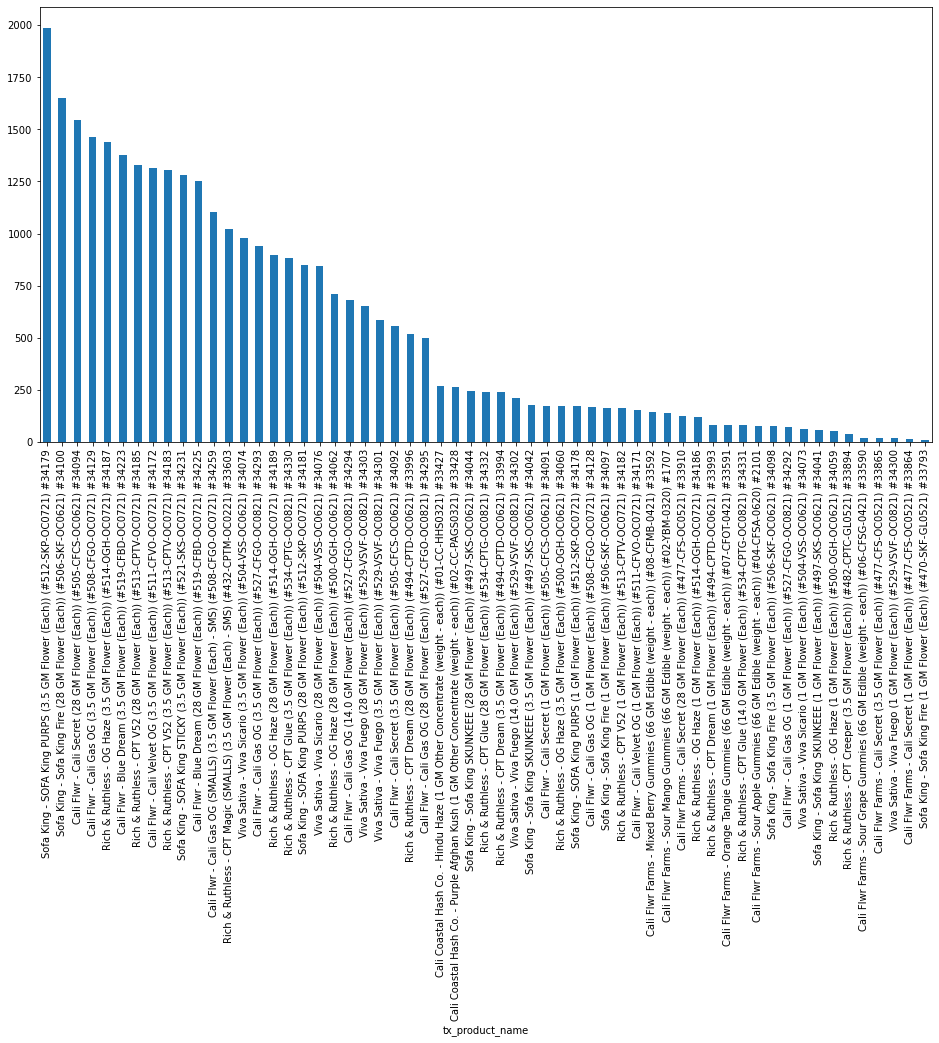

In [20]:
filtered_result_dataframe.groupby('tx_product_name')['tx_total_price'].sum().sort_values(ascending=False).plot(figsize=(16, 8), kind='bar')

In [1]:
## Break

In [21]:
filter_by_created_month = (
    (limited_result_dataframe['package_label'] == limited_result_dataframe['package_label']) &
    (limited_result_dataframe['shipped_quantity'] > 1) &
    (limited_result_dataframe['created_month'] >= '2021-04') &
    (limited_result_dataframe['created_month'] <= '2021-07')
)
filtered_result_dataframe = limited_result_dataframe[filter_by_created_month]
filtered_result_dataframe

,package_label,created_month,created_date,shipper_facility,shipper_facility_license_number,shipper_facility_name,shipped_quantity,sales_month,sales_date,sales_datetime,tx_product_name,tx_product_category_name,tx_unit_of_measure,tx_quantity_sold,tx_total_price
package_id,,,,,,,,,,,,,,,
13384889.0,1A406030000CD7A000000029,2021-04,2021-04-14,"GREEN EARTH OPERATIONS, INC. (C11-0001106-LIC)",C11-0001106-LIC,"GREEN EARTH OPERATIONS, INC.",130.0,2021-04,2021-04-19,2021-04-19 17:09:48.250,3.5g Jars Alien Venom OG,Flower (packaged eighth - each),Each,1.0,25.00
13384889.0,1A406030000CD7A000000029,2021-04,2021-04-14,"GREEN EARTH OPERATIONS, INC. (C11-0001106-LIC)",C11-0001106-LIC,"GREEN EARTH OPERATIONS, INC.",130.0,2021-04,2021-04-24,2021-04-24 14:11:11.700,3.5g Jars Alien Venom OG,Flower (packaged eighth - each),Each,1.0,25.00
13384889.0,1A406030000CD7A000000029,2021-04,2021-04-14,"GREEN EARTH OPERATIONS, INC. (C11-0001106-LIC)",C11-0001106-LIC,"GREEN EARTH OPERATIONS, INC.",130.0,2021-04,2021-04-26,2021-04-26 12:38:27.160,3.5g Jars Alien Venom OG,Flower (packaged eighth - each),Each,1.0,21.88
13384889.0,1A406030000CD7A000000029,2021-04,2021-04-14,"GREEN EARTH OPERATIONS, INC. (C11-0001106-LIC)",C11-0001106-LIC,"GREEN EARTH OPERATIONS, INC.",130.0,2021-04,2021-04-29,2021-04-29 10:05:29.960,3.5g Jars Alien Venom OG,Flower (packaged eighth - each),Each,1.0,25.00
13384889.0,1A406030000CD7A000000029,2021-04,2021-04-14,"GREEN EARTH OPERATIONS, INC. (C11-0001106-LIC)",C11-0001106-LIC,"GREEN EARTH OPERATIONS, INC.",130.0,2021-04,2021-04-29,2021-04-29 18:24:22.200,3.5g Jars Alien Venom OG,Flower (packaged eighth - each),Each,1.0,24.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16074238.0,1A4060300004398000029703,2021-07,2021-07-15,"PHC Facilities, Inc. (C11-0000072-LIC)",C11-0000072-LIC,"PHC Facilities, Inc.",32.0,2021-08,2021-08-09,2021-08-09 21:16:48.990,Exotic Genetix - The Woah 8th Case ( 32 - 8th ),Flower (packaged eighth - each),Each,1.0,34.10
16074238.0,1A4060300004398000029703,2021-07,2021-07-15,"PHC Facilities, Inc. (C11-0000072-LIC)",C11-0000072-LIC,"PHC Facilities, Inc.",32.0,2021-08,2021-08-10,2021-08-10 16:09:39.410,Exotic Genetix - The Woah 8th Case ( 32 - 8th ),Flower (packaged eighth - each),Each,1.0,62.00
16074238.0,1A4060300004398000029703,2021-07,2021-07-15,"PHC Facilities, Inc. (C11-0000072-LIC)",C11-0000072-LIC,"PHC Facilities, Inc.",32.0,2021-08,2021-08-13,2021-08-13 18:21:09.950,Exotic Genetix - The Woah 8th Case ( 32 - 8th ),Flower (packaged eighth - each),Each,1.0,62.00


In [22]:
unique_package_labels = filtered_result_dataframe.package_label.unique()
unique_package_labels[:10]

array(['1A406030000CD7A000000029', '1A406030000CD7A000000028',
       '1A406030000CD7A000000015', '1A406030000CD7A000000027',
       '1A40603000070EA000347639', '1A4060300003D05000001623',
       '1A40603000062D7000002521', '1A40603000062D7000002523',
       '1A406030000339A000009738', '1A406030000339A000009734'],
      dtype=object)

In [23]:
target_package_label = '1A406030000390D000020513'
filter_by_package_label = filtered_result_dataframe['package_label'] == target_package_label
package_label_result_dataframe = filtered_result_dataframe[filter_by_package_label]
package_label_result_dataframe

,package_label,created_month,created_date,shipper_facility,shipper_facility_license_number,shipper_facility_name,shipped_quantity,sales_month,sales_date,sales_datetime,tx_product_name,tx_product_category_name,tx_unit_of_measure,tx_quantity_sold,tx_total_price
package_id,,,,,,,,,,,,,,,
15067583.0,1A406030000390D000020513,2021-06,2021-06-11,"CALIFORNIA LOYAL, INC. (C11-0000256-LIC)",C11-0000256-LIC,"CALIFORNIA LOYAL, INC.",24.0,2021-06,2021-06-19,2021-06-19 12:39:00.960,MAADF02435 Bloom Sun Grown Flower 22.4% True O...,Flower (packaged gram - each),Each,1.0,30.00
15067583.0,1A406030000390D000020513,2021-06,2021-06-11,"CALIFORNIA LOYAL, INC. (C11-0000256-LIC)",C11-0000256-LIC,"CALIFORNIA LOYAL, INC.",24.0,2021-06,2021-06-20,2021-06-20 17:11:04.630,MAADF02435 Bloom Sun Grown Flower 22.4% True O...,Flower (packaged gram - each),Each,1.0,27.00
15067583.0,1A406030000390D000020513,2021-06,2021-06-11,"CALIFORNIA LOYAL, INC. (C11-0000256-LIC)",C11-0000256-LIC,"CALIFORNIA LOYAL, INC.",24.0,2021-06,2021-06-27,2021-06-27 19:54:17.630,MAADF02435 Bloom Sun Grown Flower 22.4% True O...,Flower (packaged gram - each),Each,1.0,30.00
15067583.0,1A406030000390D000020513,2021-06,2021-06-11,"CALIFORNIA LOYAL, INC. (C11-0000256-LIC)",C11-0000256-LIC,"CALIFORNIA LOYAL, INC.",24.0,2021-06,2021-06-30,2021-06-30 14:43:44.010,MAADF02435 Bloom Sun Grown Flower 22.4% True O...,Flower (packaged gram - each),Each,1.0,25.50
15067583.0,1A406030000390D000020513,2021-06,2021-06-11,"CALIFORNIA LOYAL, INC. (C11-0000256-LIC)",C11-0000256-LIC,"CALIFORNIA LOYAL, INC.",24.0,2021-06,2021-06-30,2021-06-30 17:43:56.000,MAADF02435 Bloom Sun Grown Flower 22.4% True O...,Flower (packaged gram - each),Each,1.0,25.50
15067583.0,1A406030000390D000020513,2021-06,2021-06-11,"CALIFORNIA LOYAL, INC. (C11-0000256-LIC)",C11-0000256-LIC,"CALIFORNIA LOYAL, INC.",24.0,2021-07,2021-07-04,2021-07-04 13:20:20.300,MAADF02435 Bloom Sun Grown Flower 22.4% True O...,Flower (packaged gram - each),Each,1.0,25.50
15067583.0,1A406030000390D000020513,2021-06,2021-06-11,"CALIFORNIA LOYAL, INC. (C11-0000256-LIC)",C11-0000256-LIC,"CALIFORNIA LOYAL, INC.",24.0,2021-07,2021-07-05,2021-07-05 12:51:22.350,MAADF02435 Bloom Sun Grown Flower 22.4% True O...,Flower (packaged gram - each),Each,1.0,27.00
15067583.0,1A406030000390D000020513,2021-06,2021-06-11,"CALIFORNIA LOYAL, INC. (C11-0000256-LIC)",C11-0000256-LIC,"CALIFORNIA LOYAL, INC.",24.0,2021-07,2021-07-06,2021-07-06 13:00:08.190,MAADF02435 Bloom Sun Grown Flower 22.4% True O...,Flower (packaged gram - each),Each,1.0,25.50
15067583.0,1A406030000390D000020513,2021-06,2021-06-11,"CALIFORNIA LOYAL, INC. (C11-0000256-LIC)",C11-0000256-LIC,"CALIFORNIA LOYAL, INC.",24.0,2021-07,2021-07-08,2021-07-08 20:59:14.210,MAADF02435 Bloom Sun Grown Flower 22.4% True O...,Flower (packaged gram - each),Each,1.0,30.00


In [24]:
package_label_records = package_label_result_dataframe.to_dict('records')
package_label_records[0:2]

[{'package_label': '1A406030000390D000020513',
  'created_month': '2021-06',
  'created_date': Timestamp('2021-06-11 00:00:00'),
  'shipper_facility': 'CALIFORNIA LOYAL, INC. (C11-0000256-LIC)',
  'shipper_facility_license_number': 'C11-0000256-LIC',
  'shipper_facility_name': 'CALIFORNIA LOYAL, INC.',
  'shipped_quantity': 24.0,
  'sales_month': '2021-06',
  'sales_date': '2021-06-19',
  'sales_datetime': Timestamp('2021-06-19 12:39:00.960000'),
  'tx_product_name': 'MAADF02435 Bloom Sun Grown Flower 22.4% True OG Indica CVL-TG052621',
  'tx_product_category_name': 'Flower (packaged gram - each)',
  'tx_unit_of_measure': 'Each',
  'tx_quantity_sold': 1.0,
  'tx_total_price': 30.0},
 {'package_label': '1A406030000390D000020513',
  'created_month': '2021-06',
  'created_date': Timestamp('2021-06-11 00:00:00'),
  'shipper_facility': 'CALIFORNIA LOYAL, INC. (C11-0000256-LIC)',
  'shipper_facility_license_number': 'C11-0000256-LIC',
  'shipper_facility_name': 'CALIFORNIA LOYAL, INC.',
  's

In [55]:
from datetime import datetime

def compute_sell_through_for_package_label_records(package_label_records):
    created_date = None
    shipped_quantity = None
    product_category_name = None
    product_name = None
    
    # As of what date is X% of package is sold?
    percent_25_date = None
    percent_50_date = None
    percent_75_date = None
    percent_90_date = None
    percent_100_date = None
    
    # How many days until X% of package is sold?
    percent_25_days_count = None
    percent_50_days_count = None
    percent_75_days_count = None
    percent_90_days_count = None
    percent_100_days_count = None
    
    # As of date when X% of package is sold, on average how many units are sold per day?
    percent_25_days_count_norm = None
    percent_50_days_count_norm = None
    percent_75_days_count_norm = None
    percent_90_days_count_norm = None
    percent_100_days_count_norm = None

    running_gmv = 0
    running_quantity_sold = 0
    
    for package_label_record in package_label_records:
    #     print(package_label_record)
        if created_date is None:
            created_date = package_label_record['created_date']
            shipped_quantity = package_label_record['shipped_quantity']
            product_category_name = package_label_record['tx_product_category_name']
            product_name = package_label_record['tx_product_name']

        running_gmv += package_label_record['tx_total_price']
        running_quantity_sold += package_label_record['tx_quantity_sold']

        if shipped_quantity is None:
            print('BAD!')
            continue

        sold_ratio = running_quantity_sold / shipped_quantity

        if percent_25_date is None and sold_ratio >= 0.25:
            percent_25_date = package_label_record['sales_date']
            percent_25_days_count = (datetime.strptime(percent_25_date, '%Y-%m-%d') - created_date).days
            percent_25_days_count_norm = (shipped_quantity * 0.25) / percent_25_days_count

        if percent_50_date is None and sold_ratio >= 0.5:
            percent_50_date = package_label_record['sales_date']
            percent_50_days_count = (datetime.strptime(percent_50_date, '%Y-%m-%d') - created_date).days
            percent_50_days_count_norm = (shipped_quantity * 0.5) / percent_50_days_count

        if percent_75_date is None and sold_ratio >= 0.75:
            percent_75_date = package_label_record['sales_date']
            percent_75_days_count = (datetime.strptime(percent_75_date, '%Y-%m-%d') - created_date).days
            percent_75_days_count_norm = (shipped_quantity * 0.75) / percent_75_days_count

        if percent_90_date is None and sold_ratio >= 0.9:
            percent_90_date = package_label_record['sales_date']
            percent_90_days_count = (datetime.strptime(percent_90_date, '%Y-%m-%d') - created_date).days
            percent_90_days_count_norm = (shipped_quantity * 0.9) / percent_90_days_count

        if percent_100_date is None and sold_ratio >= 1.0:
            percent_100_date = package_label_record['sales_date']
            percent_100_days_count = (datetime.strptime(percent_100_date, '%Y-%m-%d') - created_date).days
            percent_100_days_count_norm = (shipped_quantity * 1.0) / percent_100_days_count

    return [
        target_package_label,
        product_category_name,
        product_name,
        created_date.strftime('%Y-%m-%d'),
        shipped_quantity,
        running_gmv / running_quantity_sold, # Average sales price per unit
        percent_25_date,
        percent_25_days_count,
        percent_25_days_count_norm,
        percent_50_date,
        percent_50_days_count,
        percent_50_days_count_norm,
        percent_75_date,
        percent_75_days_count,
        percent_75_days_count_norm,
        percent_90_date,
        percent_90_days_count,
        percent_90_days_count_norm,
        percent_100_date,
        percent_100_days_count,
        percent_100_days_count_norm,
    ]

def compute_sell_through_for_package_label(package_label):
    filter_by_package_label = filtered_result_dataframe['package_label'] == package_label
    package_label_result_dataframe = filtered_result_dataframe[filter_by_package_label]    
    package_label_records = package_label_result_dataframe.to_dict('records')
    return compute_sell_through_for_package_label_records(package_label_records)

In [56]:
unique_package_labels = filtered_result_dataframe.package_label.unique()
sell_throughs = [compute_sell_through_for_package_label(package_label) for package_label in unique_package_labels]
sell_throughs_dataframe = pandas.DataFrame(
    sell_throughs,
    columns=[
        'package_label',
        'product_category_name',
        'product_name',
        'created_date',
        'shipped_quantity',
        'average_sales_price',
        'percent_25_date',
        'percent_25_days_count',
        'percent_25_days_count_norm',
        'percent_50_date',
        'percent_50_days_count',
        'percent_50_days_count_norm',
        'percent_75_date',
        'percent_75_days_count',
        'percent_75_days_count_norm',
        'percent_90_date',
        'percent_90_days_count',
        'percent_90_days_count_norm',
        'percent_100_date',
        'percent_100_days_count',
        'percent_100_days_count_norm',
    ])

In [57]:
sell_throughs_dataframe

,package_label,product_category_name,product_name,created_date,shipped_quantity,average_sales_price,percent_25_date,percent_25_days_count,percent_25_days_count_norm,percent_50_date,...,percent_50_days_count_norm,percent_75_date,percent_75_days_count,percent_75_days_count_norm,percent_90_date,percent_90_days_count,percent_90_days_count_norm,percent_100_date,percent_100_days_count,percent_100_days_count_norm
0,1A406030000390D000020513,Flower (packaged eighth - each),3.5g Jars Alien Venom OG,2021-04-14,130.0,20.268333,2021-05-22,38.0,0.855263,2021-06-18,...,1.000000,2021-07-05,82.0,1.189024,2021-07-16,93.0,1.258065,None,NaN,NaN
1,1A406030000390D000020513,Flower (packaged eighth - each),3.5g Jars Cosmic Ice Cream Cake,2021-04-14,130.0,26.014206,2021-05-01,17.0,1.911765,2021-05-14,...,2.166667,2021-05-26,42.0,2.321429,2021-06-08,55.0,2.127273,None,NaN,NaN
2,1A406030000390D000020513,Pre-Roll Flower,.75g CICC Pre-Roll,2021-04-14,77.0,6.598116,2021-04-20,6.0,3.208333,2021-05-18,...,1.132353,2021-06-08,55.0,1.050000,None,NaN,NaN,None,NaN,NaN
3,1A406030000390D000020513,Pre-Roll Flower,.75g AVOG Pre-Roll,2021-04-14,500.0,2.866100,2021-05-12,28.0,4.464286,2021-06-12,...,4.237288,2021-07-08,85.0,4.411765,2021-07-28,105.0,4.285714,None,NaN,NaN
4,1A406030000390D000020513,Vape Cartridge (volume - each),LIIIL - Blue Dream Disposable - 0.5g,2021-04-08,25.0,27.238889,2021-05-14,36.0,0.173611,2021-06-06,...,0.211864,2021-06-16,69.0,0.271739,2021-07-01,84.0,0.267857,2021-07-09,92.0,0.271739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
647,1A406030000390D000020513,Edible (weight - each),Lost Farm Chews Cherry 100mg Sky OG,2021-07-23,40.0,22.054865,2021-07-31,8.0,1.250000,2021-08-09,...,1.176471,2021-08-20,28.0,1.071429,2021-08-24,32.0,1.125000,None,NaN,NaN
648,1A406030000390D000020513,Pre-Roll Flower,AE El Bluntito Kush Cake,2021-07-23,45.0,15.909091,None,NaN,NaN,None,...,NaN,None,NaN,NaN,None,NaN,NaN,None,NaN,NaN
649,1A406030000390D000020513,Flower (packaged eighth - each),Exotic Genetix- Cream Pop Case(32-8th),2021-07-15,32.0,55.064286,None,NaN,NaN,None,...,NaN,None,NaN,NaN,None,NaN,NaN,None,NaN,NaN
650,1A406030000390D000020513,Flower (packaged eighth - each),"Exotic Genetix - Milk ""N"" Cookies 8th Case(32-...",2021-07-15,32.0,56.276923,2021-08-19,35.0,0.228571,None,...,NaN,None,NaN,NaN,None,NaN,NaN,None,NaN,NaN


In [58]:
import time

xlsx_file_name = f'~/Downloads/sell_throughs_data_{round(time.time())}.xlsx'
sell_throughs_dataframe.to_excel(xlsx_file_name, index=False)

In [ ]:
# TODOs
# 1. Merge together packages of the same product with the same created date
# 2. 